In [1]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabaz_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


%matplotlib inline  

In [3]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_pickle('d2.pkl')
#df.columns[139:154]

In [4]:
names = df.iloc[:,0].values
# belowis full dataset
X = df.iloc[:,5:].values

#X = df.iloc[:,139:154].values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Columns: 159 entries, town to developer_rate
dtypes: float64(152), int64(2), object(5)
memory usage: 706.2+ KB


In [5]:
#X = df.iloc[:,2:].values
#X = df2.values

X = preprocessing.scale(X)
type(X)

numpy.ndarray

In [34]:

clusterer = AffinityPropagation(damping=0.999, max_iter=200, convergence_iter=15, copy=True, 
                                preference=None, affinity='euclidean', verbose=True)
cluster_labels = clusterer.fit_predict(X)
    
cluster_centers = clusterer.cluster_centers_ 
indices = clusterer.cluster_centers_indices_
len(indices)

k = list(zip(df['town'],cluster_labels))

silhouette_avg = silhouette_score(X, cluster_labels, metric='correlation')
ch_score = calinski_harabaz_score(X, cluster_labels)
print("For n_clusters =", len(indices),
          "The average silhouette_score is :", silhouette_avg,
         "\nThe Calinski Harabasz score is :", ch_score)

k

Converged after 15 iterations.
For n_clusters = 21 The average silhouette_score is : -0.0539422296462 
The Calinski Harabasz score is : 19.3082215694


[('Absecon city', 16),
 ('Atlantic City city', 2),
 ('Brigantine city', 1),
 ('Buena borough', 8),
 ('Buena Vista township', 8),
 ('Corbin City city', 1),
 ('Egg Harbor township', 16),
 ('Egg Harbor City city', 8),
 ('Estell Manor city', 5),
 ('Folsom borough', 9),
 ('Galloway township', 9),
 ('Hamilton township', 1),
 ('Hammonton town', 16),
 ('Linwood city', 16),
 ('Longport borough', 0),
 ('Margate City city', 0),
 ('Mullica township', 9),
 ('Northfield city', 16),
 ('Pleasantville city', 1),
 ('Port Republic city', 5),
 ('Somers Point city', 1),
 ('Ventnor City city', 1),
 ('Weymouth township', 1),
 ('Allendale borough', 6),
 ('Alpine borough', 17),
 ('Bergenfield borough', 16),
 ('Bogota borough', 16),
 ('Carlstadt borough', 16),
 ('Cliffside Park borough', 2),
 ('Closter borough', 6),
 ('Cresskill borough', 6),
 ('Demarest borough', 17),
 ('Dumont borough', 16),
 ('East Rutherford borough', 2),
 ('Edgewater borough', 2),
 ('Elmwood Park borough', 16),
 ('Emerson borough', 6),
 ('

In [35]:
#k = list(k)
k.sort(key=lambda tup: tup[1]) 
k

[('Longport borough', 0),
 ('Margate City city', 0),
 ('Avalon borough', 0),
 ('North Wildwood city', 0),
 ('Stone Harbor borough', 0),
 ('West Wildwood borough', 0),
 ('Wildwood Crest borough', 0),
 ('Avon-by-the-Sea borough', 0),
 ('Deal borough', 0),
 ('Monmouth Beach borough', 0),
 ('Spring Lake Heights borough', 0),
 ('Barnegat Light borough', 0),
 ('Bay Head borough', 0),
 ('Beach Haven borough', 0),
 ('Berkeley township', 0),
 ('Harvey Cedars borough', 0),
 ('Lavallette borough', 0),
 ('Long Beach township', 0),
 ('Manchester township', 0),
 ('Seaside Park borough', 0),
 ('Ship Bottom borough', 0),
 ('Surf City borough', 0),
 ('White township', 0),
 ('Brigantine city', 1),
 ('Corbin City city', 1),
 ('Hamilton township', 1),
 ('Pleasantville city', 1),
 ('Somers Point city', 1),
 ('Ventnor City city', 1),
 ('Weymouth township', 1),
 ('Edgewater Park township', 1),
 ('Maple Shade township', 1),
 ('Wrightstown borough', 1),
 ('Camden city', 1),
 ('Collingswood borough', 1),
 ('Lin

Automatically created module for IPython interactive environment
For n_clusters = 21 The average silhouette_score is : 0.21624174357 
The Calinski Harabasz score is : 80.9020081884


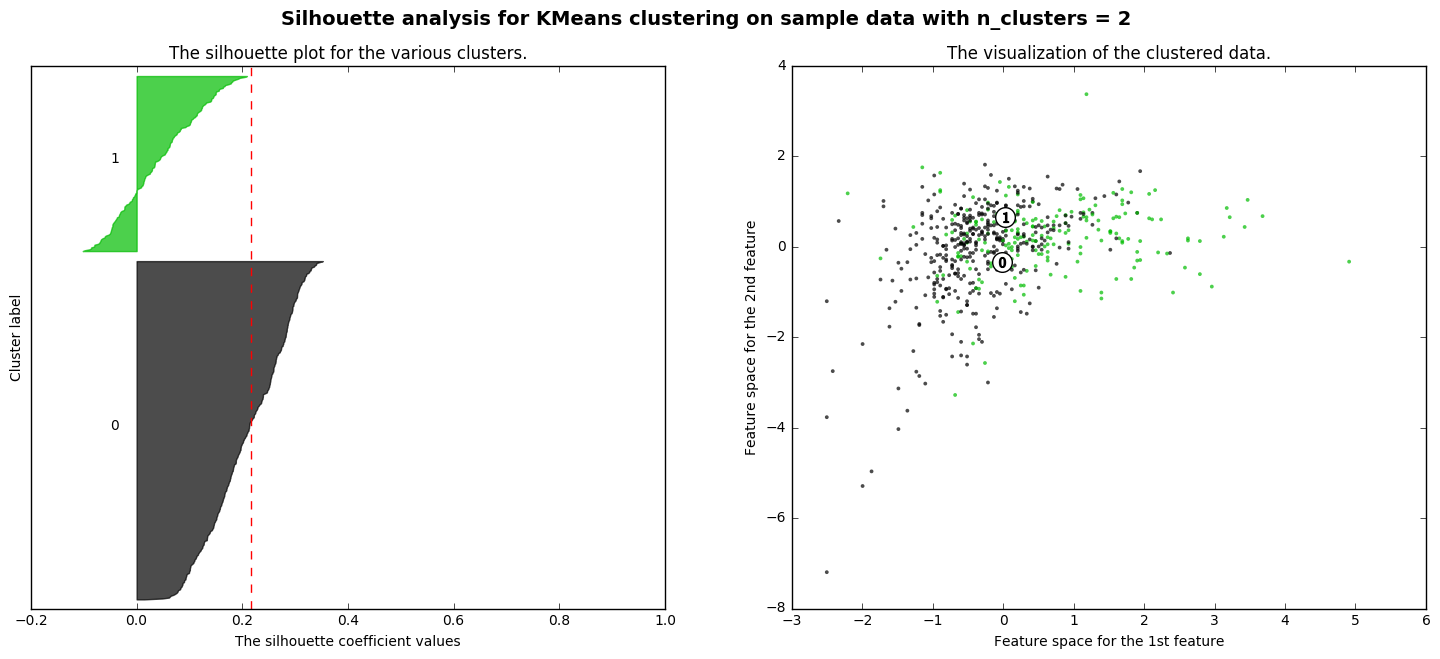

For n_clusters = 21 The average silhouette_score is : 0.0412653379046 
The Calinski Harabasz score is : 37.0636037951


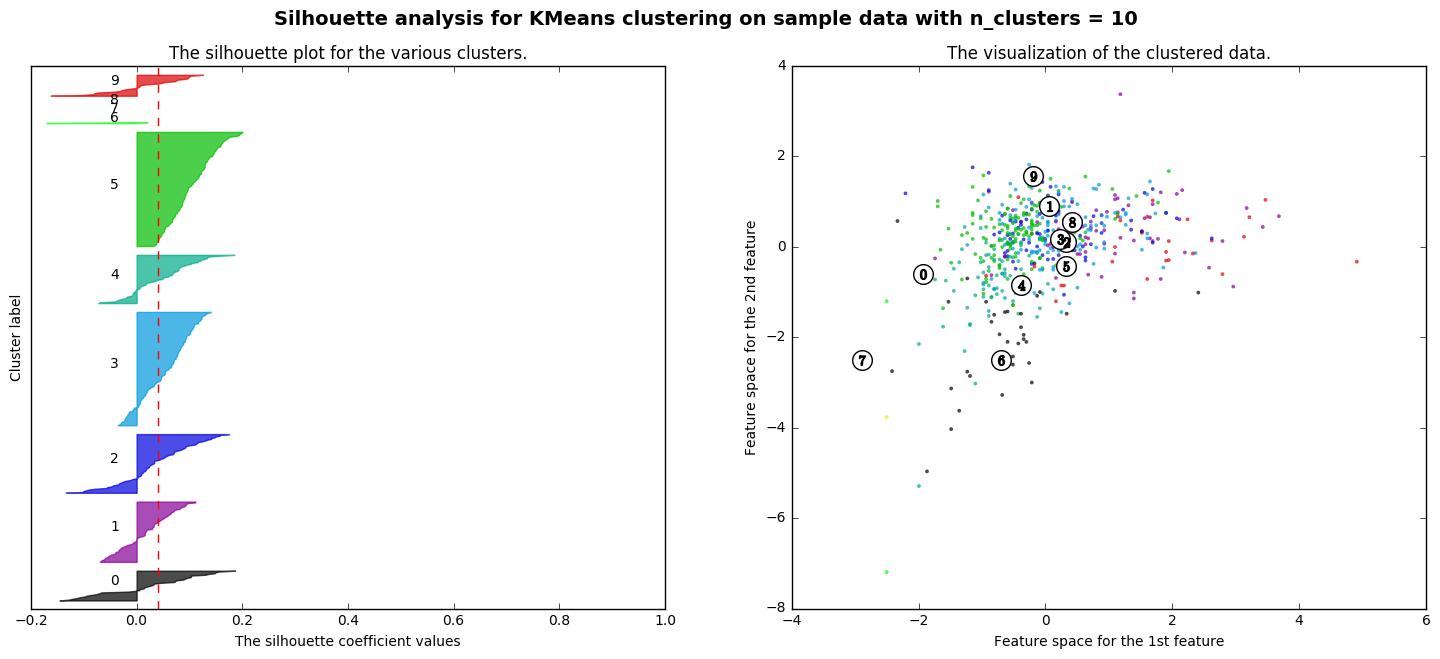

For n_clusters = 21 The average silhouette_score is : 0.0262672711174 
The Calinski Harabasz score is : 23.5414214412


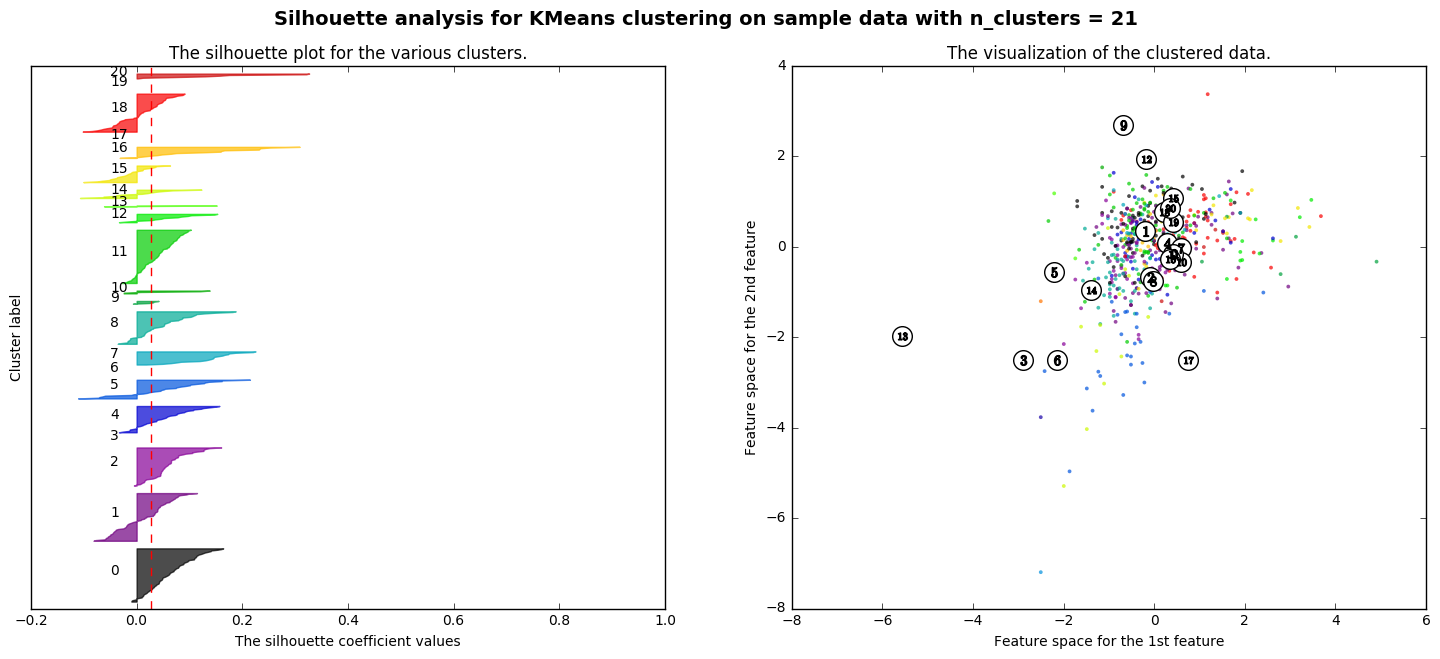

For n_clusters = 21 The average silhouette_score is : 0.21624174357 
The Calinski Harabasz score is : 80.9020081884


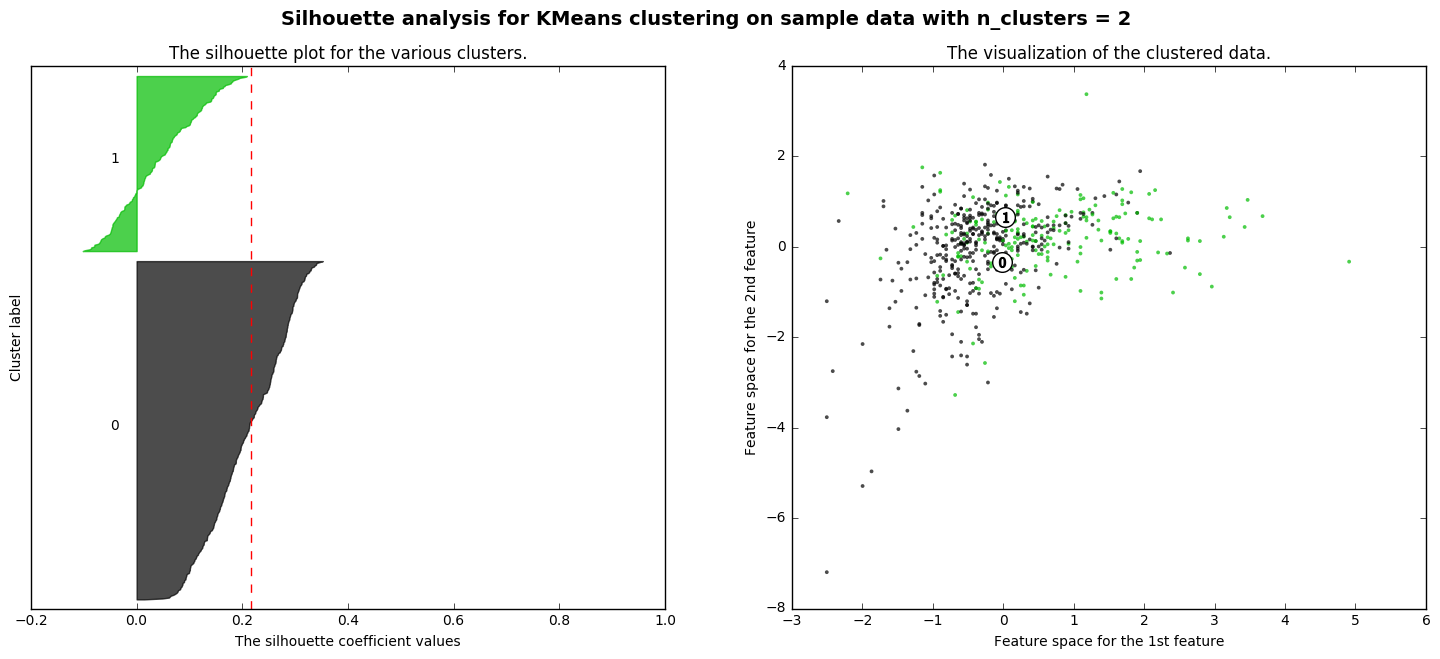

In [37]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                  center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

range_n_clusters = [2,10, 21,2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=1000)

    cluster_labels = clusterer.fit_predict(X)
    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='correlation')
    ch_score = calinski_harabaz_score(X, cluster_labels)
    print("For n_clusters =", len(indices),
          "The average silhouette_score is :", silhouette_avg,
         "\nThe Calinski Harabasz score is :", ch_score)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
       # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 1], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
    
    

In [38]:
#for i in zip(df['town'],cluster_labels):
l = [(i[1], i[0]) for i in zip(df['town'],cluster_labels)]
#    print(i)
l.sort(key=lambda tup: tup[0])  # sorts in place
#print(pd.DataFrame(l))
l

[(0, 'Absecon city'),
 (0, 'Corbin City city'),
 (0, 'Egg Harbor township'),
 (0, 'Estell Manor city'),
 (0, 'Folsom borough'),
 (0, 'Linwood city'),
 (0, 'Longport borough'),
 (0, 'Margate City city'),
 (0, 'Northfield city'),
 (0, 'Port Republic city'),
 (0, 'Weymouth township'),
 (0, 'Allendale borough'),
 (0, 'Alpine borough'),
 (0, 'Closter borough'),
 (0, 'Cresskill borough'),
 (0, 'Demarest borough'),
 (0, 'Dumont borough'),
 (0, 'Emerson borough'),
 (0, 'Englewood Cliffs borough'),
 (0, 'Fair Lawn borough'),
 (0, 'Franklin Lakes borough'),
 (0, 'Glen Rock borough'),
 (0, 'Harrington Park borough'),
 (0, 'Hasbrouck Heights borough'),
 (0, 'Haworth borough'),
 (0, 'Hillsdale borough'),
 (0, 'Ho-Ho-Kus borough'),
 (0, 'Leonia borough'),
 (0, 'Mahwah township'),
 (0, 'Maywood borough'),
 (0, 'Midland Park borough'),
 (0, 'Montvale borough'),
 (0, 'New Milford borough'),
 (0, 'Northvale borough'),
 (0, 'Norwood borough'),
 (0, 'Oakland borough'),
 (0, 'Old Tappan borough'),
 (0, 'Or

In [39]:
df_to_d3 = df.loc[:,'FIPS':'city_town'] 
df_to_d3['cluster'] = cluster_labels
df_to_d3.columns = ['id','name','cluster']
#cluster_labels]])
df_to_d3.head()
df_to_d3.to_csv('clusters2.tsv',sep = '\t', index = False)